# Day 3: Load, Clean, and Explore Your Data

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('C:\\Users\\rohit\\depression-risk-predictor\\data\\raw\\mock_survey_data.csv')
df.head()


,age,gender,occupation,sleep_hours,social_media_minutes,activity_level,emotional_score,mental_health_history,post_text,risk
0,33,Male,Engineer,4.7,82,9935,1,No,I can't do this anymore.,1
1,18,Male,Student,6.3,43,4257,10,No,Everything feels heavy.,1
2,25,Male,Freelancer,7.3,204,5552,2,Yes,I'm full of energy!,0
3,21,Male,Student,5.5,206,5333,0,No,Feeling a bit anxious.,0
4,27,Other,Writer,5.1,351,6925,9,Yes,I can't do this anymore.,1


In [7]:

# Check types and nulls
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    103 non-null    int64  
 1   gender                 103 non-null    object 
 2   occupation             103 non-null    object 
 3   sleep_hours            103 non-null    float64
 4   social_media_minutes   103 non-null    int64  
 5   activity_level         103 non-null    int64  
 6   emotional_score        103 non-null    int64  
 7   mental_health_history  103 non-null    object 
 8   post_text              103 non-null    object 
 9   risk                   103 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 8.2+ KB


age                      0
gender                   0
occupation               0
sleep_hours              0
social_media_minutes     0
activity_level           0
emotional_score          0
mental_health_history    0
post_text                0
risk                     0
dtype: int64

In [8]:

# Clean up column types
df['mental_health_history'] = df['mental_health_history'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')

# Drop rows with missing values
df.dropna(inplace=True)


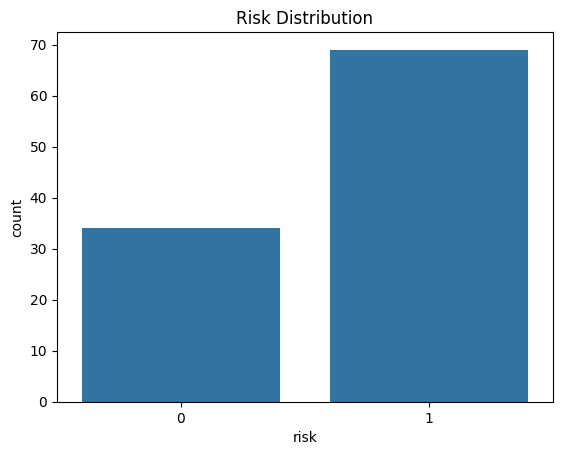

In [9]:

# Plot class balance
sns.countplot(x='risk', data=df)
plt.title('Risk Distribution')
plt.show()


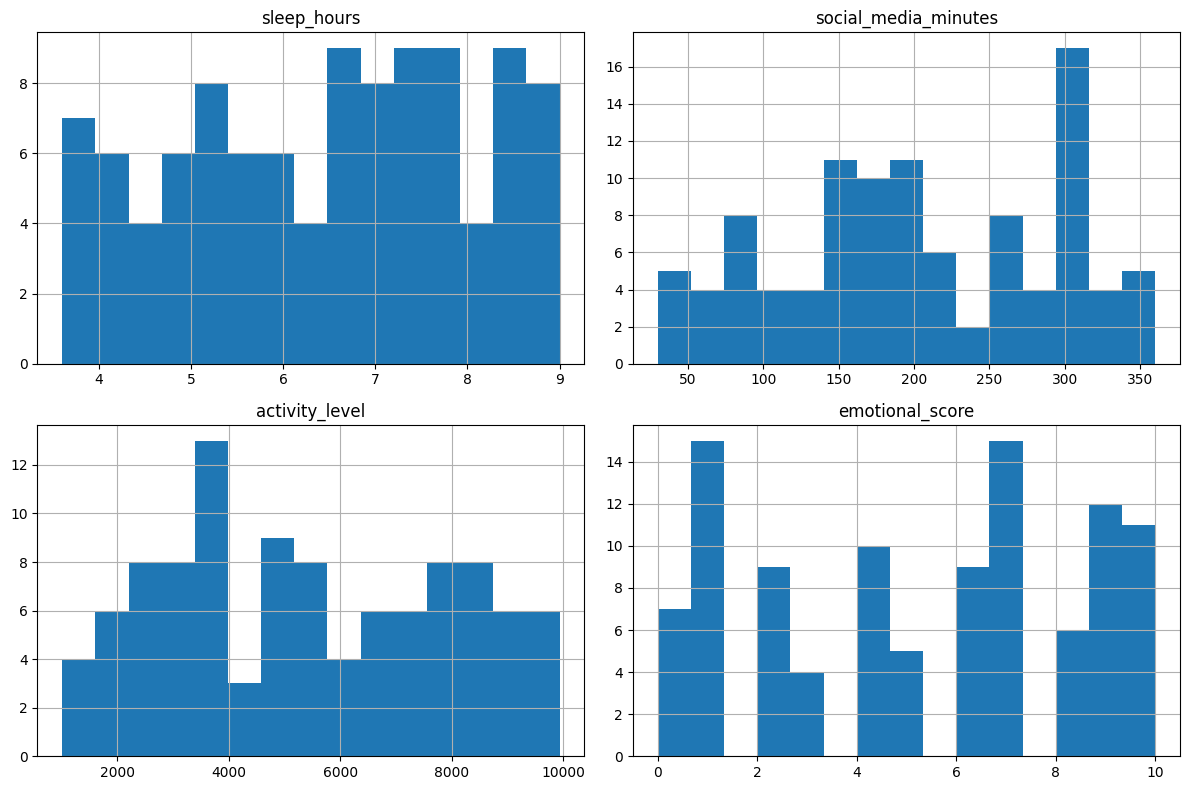

In [10]:

# Plot distributions of numerical features
df[['sleep_hours', 'social_media_minutes', 'activity_level', 'emotional_score']].hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()


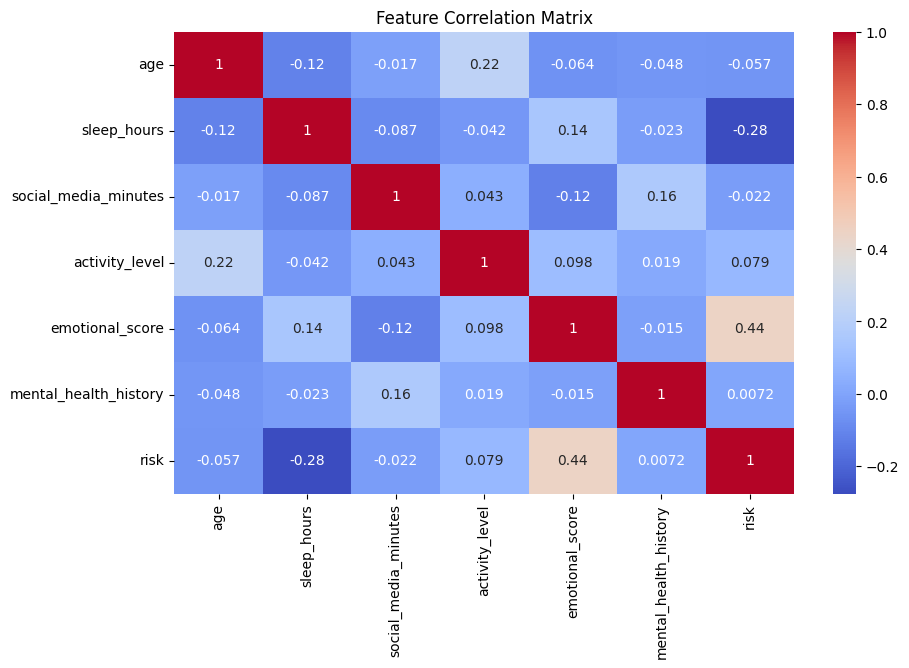

In [11]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [13]:

# OPTIONAL: Add sentiment score from post text
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiment_score'] = df['post_text'].apply(get_sentiment)
df[['post_text', 'sentiment_score']].head()


,post_text,sentiment_score
0,I can't do this anymore.,0.0000
1,Everything feels heavy.,-0.2000
2,I'm full of energy!,0.4375
3,Feeling a bit anxious.,-0.2500
4,I can't do this anymore.,0.0000


In [14]:

# Save processed data
import os

# Create the directory if it doesn't exist
os.makedirs('C:/Users/rohit/depression-risk-predictor/data/processed', exist_ok=True)

# Save the cleaned DataFrame
df.to_csv('C:/Users/rohit/depression-risk-predictor/data/processed/cleaned_survey_data.csv', index=False)

print("✅ File saved successfully!")


✅ File saved successfully!
